In [4]:
library(tidyverse)
library(ggfortify)
library(plotly)

In [3]:
train = read.csv("tf-train.csv")
train %>% head

,X000,X10,X2016,according,added,administration,america,american,americans,anti,⋯,went,white,won,work,working,world,year,years,york,label
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,0,0.00000000,0.4051146,0.00000000,0.0000000,0.000000,0,0.00000000,0.00000000,0.15145815,⋯,0,0.0000000,0,0.00000000,0.0000000,0.0000000,0.00000000,0.00000000,0.00000000,1
2,0,0.07880712,0.0000000,0.00000000,0.0000000,0.000000,0,0.00000000,0.00000000,0.00000000,⋯,0,0.0000000,0,0.00000000,0.0000000,0.0000000,0.10420527,0.23369550,0.00000000,0
3,0,0.00000000,0.0000000,0.00000000,0.0000000,0.105512,0,0.00000000,0.00000000,0.00000000,⋯,0,0.0000000,0,0.10803641,0.1244845,0.1044953,0.24538880,0.09172002,0.00000000,0
4,0,0.00000000,0.0000000,0.00000000,0.0000000,0.000000,0,0.00000000,0.25203164,0.00000000,⋯,0,0.2028763,0,0.00000000,0.0000000,0.0000000,0.00000000,0.00000000,0.00000000,0
5,0,0.05345080,0.0000000,0.04172152,0.0000000,0.000000,0,0.08385667,0.09914871,0.05390081,⋯,0,0.1197167,0,0.09335017,0.1613436,0.0000000,0.07067705,0.07925180,0.05230064,1
6,0,0.00000000,0.0000000,0.20399318,0.1280301,0.000000,0,0.00000000,0.00000000,0.00000000,⋯,0,0.0000000,0,0.00000000,0.0000000,0.0000000,0.00000000,0.00000000,0.00000000,1


In [5]:
train = train %>% mutate(label = recode(label, `1` = "Fake", `0` = "True"))

In [6]:
pca = princomp(train %>% select(-label), cor = T)
pca

Call:
princomp(x = train %>% select(-label), cor = T)

Standard deviations:
   Comp.1    Comp.2    Comp.3    Comp.4    Comp.5    Comp.6    Comp.7    Comp.8 
2.3719725 1.8996819 1.7361424 1.6410293 1.5485933 1.5065200 1.4312266 1.3771536 
   Comp.9   Comp.10   Comp.11   Comp.12   Comp.13   Comp.14   Comp.15   Comp.16 
1.3331214 1.3009714 1.2963007 1.2619128 1.2464359 1.2256537 1.2022779 1.1727753 
  Comp.17   Comp.18   Comp.19   Comp.20   Comp.21   Comp.22   Comp.23   Comp.24 
1.1550564 1.1485693 1.1451202 1.1338604 1.1220502 1.1199332 1.1068235 1.1016653 
  Comp.25   Comp.26   Comp.27   Comp.28   Comp.29   Comp.30   Comp.31   Comp.32 
1.0942429 1.0885625 1.0851090 1.0798426 1.0756717 1.0724998 1.0658265 1.0629331 
  Comp.33   Comp.34   Comp.35   Comp.36   Comp.37   Comp.38   Comp.39   Comp.40 
1.0593576 1.0566172 1.0535667 1.0497676 1.0479773 1.0460542 1.0424230 1.0389243 
  Comp.41   Comp.42   Comp.43   Comp.44   Comp.45   Comp.46   Comp.47   Comp.48 
1.0360733 1.0343490 1.0304520 1.0

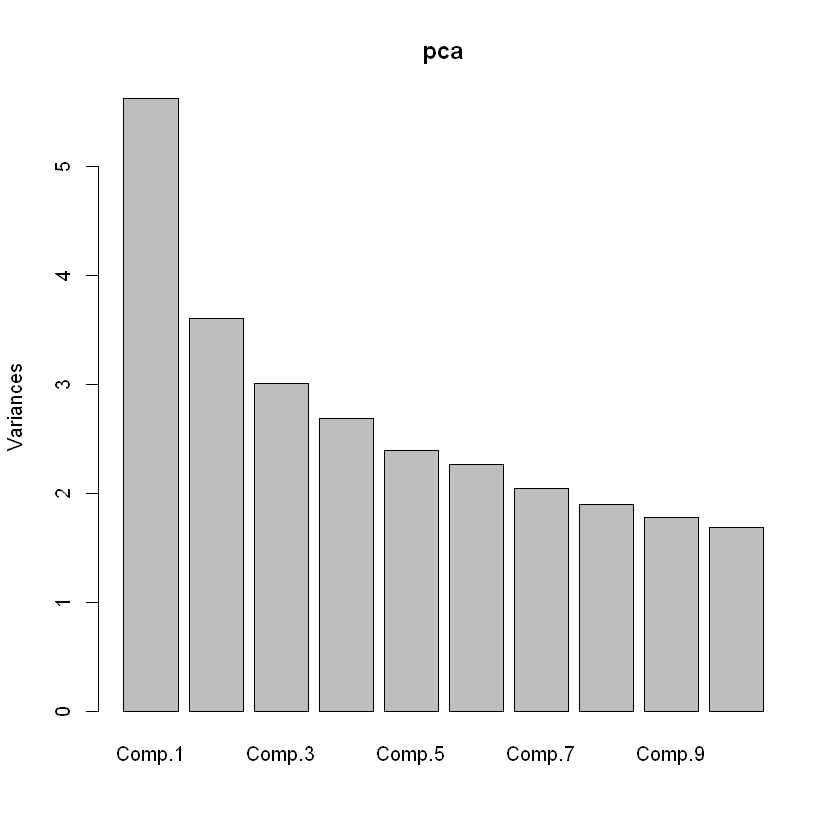

In [10]:
plot(pca)

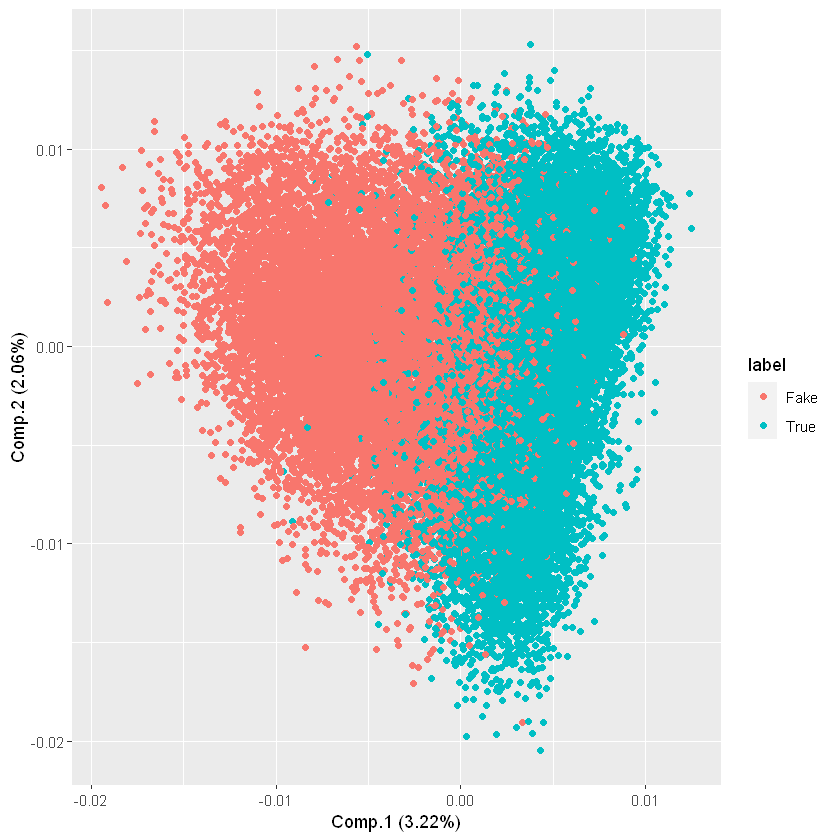

In [45]:
autoplot(pca, data = train, colour = "label")

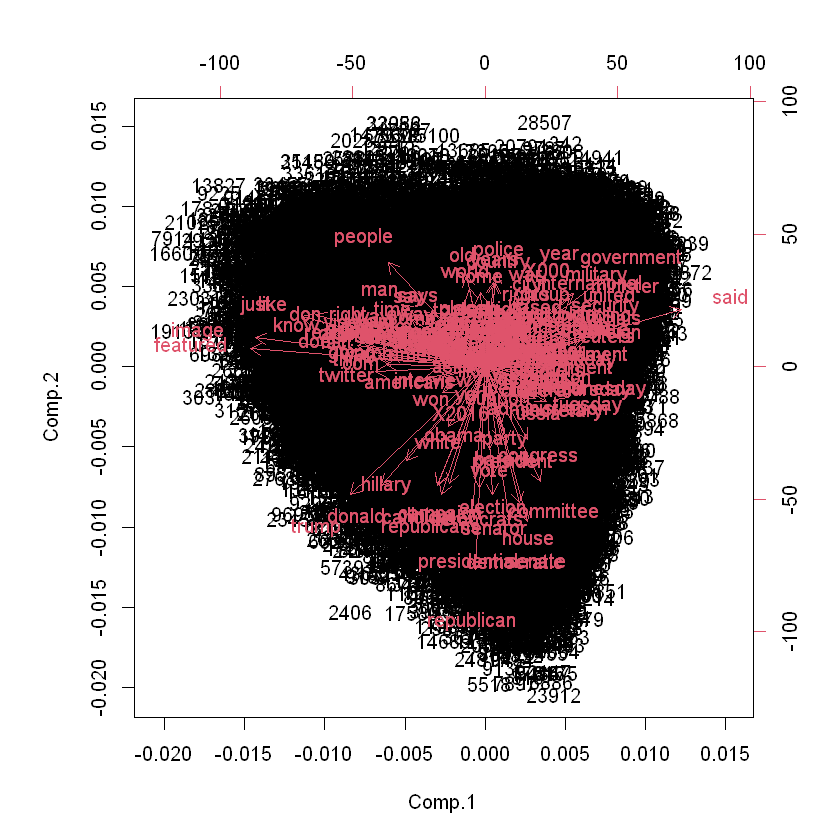

In [12]:
biplot(pca)

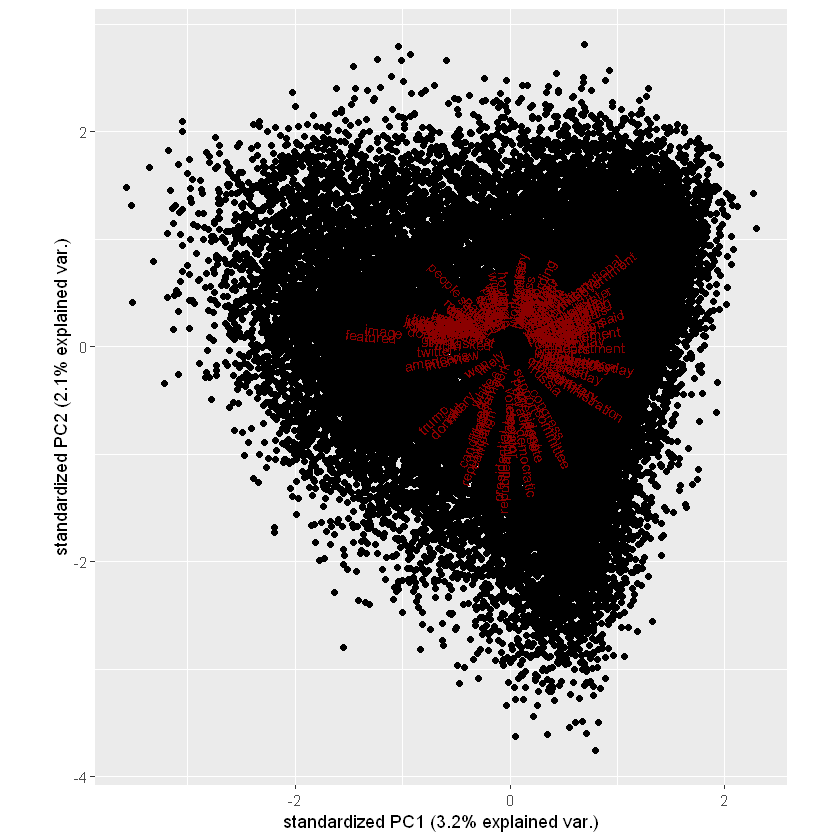

In [70]:
library(ggbiplot)

ggbiplot(pca)

In [8]:
pca_projections = as.data.frame(as.matrix(train %>% select(-label)) %*% loadings(pca)[, 1:3])
pca_projections = cbind(pca_projections, as.factor(train$label))
colnames(pca_projections) = c("V1", "V2", "V3", "label")



In [ ]:
plot_ly(pca_projections, x = ~V1, y = ~V2, z = ~V3, color = ~label)

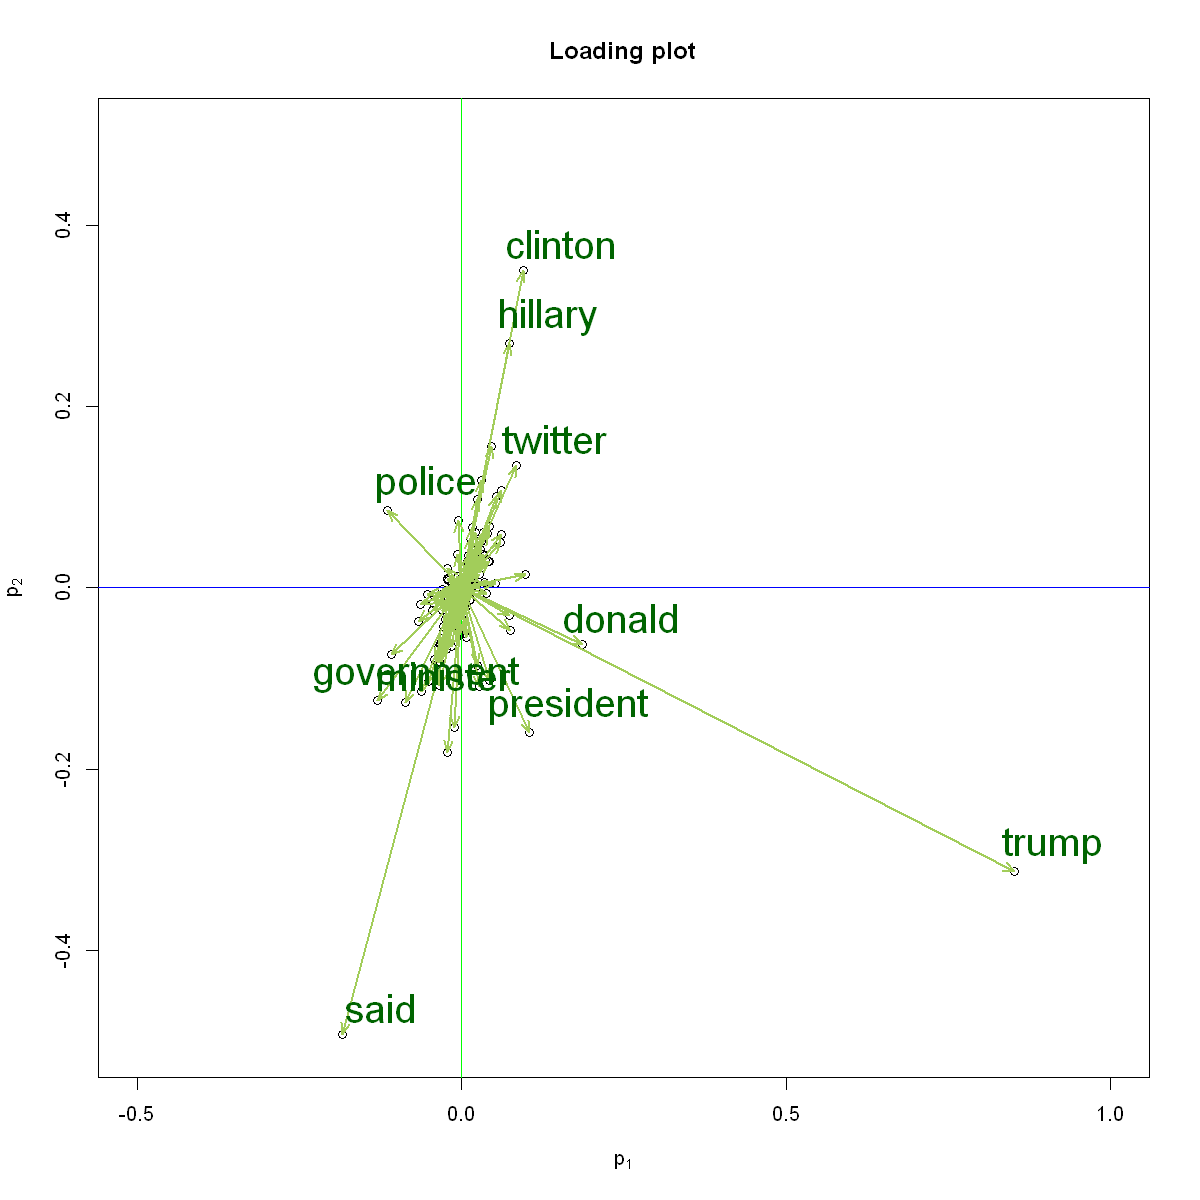

In [33]:
options(repr.plot.width=10, repr.plot.height=10)
e <- eigen(cov(train %>% select(-label)))
loading.vector <- e$vectors

p = colnames(train %>% select(-label)) %>% length
names = rep("", p)
x = sqrt(loading.vector[,1]^2 * loading.vector[,2]^2)
lst <- sort(x, index.return=TRUE, decreasing=TRUE)
s = lapply(lst, `[`, lst$x %in% head(unique(lst$x),10))$ix
names[s] = colnames(train %>% select(-label))[s]

rownames(loading.vector) <- names

# Plot the loading vector
plot(loading.vector, 
     xlab = expression('p'[1]), 
     ylab = expression('p'[2]), 
     main = 'Loading plot',
     ylim = c(-0.5,0.5),
     xlim = c(-0.5,1))
abline(h = 0, col = "blue")
abline(v = 0, col = "green")

arrows(0,0,loading.vector[,1],
        loading.vector[,2],
        length = 0.1,
        lwd=  2,
        angle = 20,
        col = "darkolivegreen3")

# Plot the loadings as points
text(loading.vector[,1]+0.06,
     loading.vector[,2]+0.03,
     rownames(loading.vector),
     col="darkgreen", cex=2)

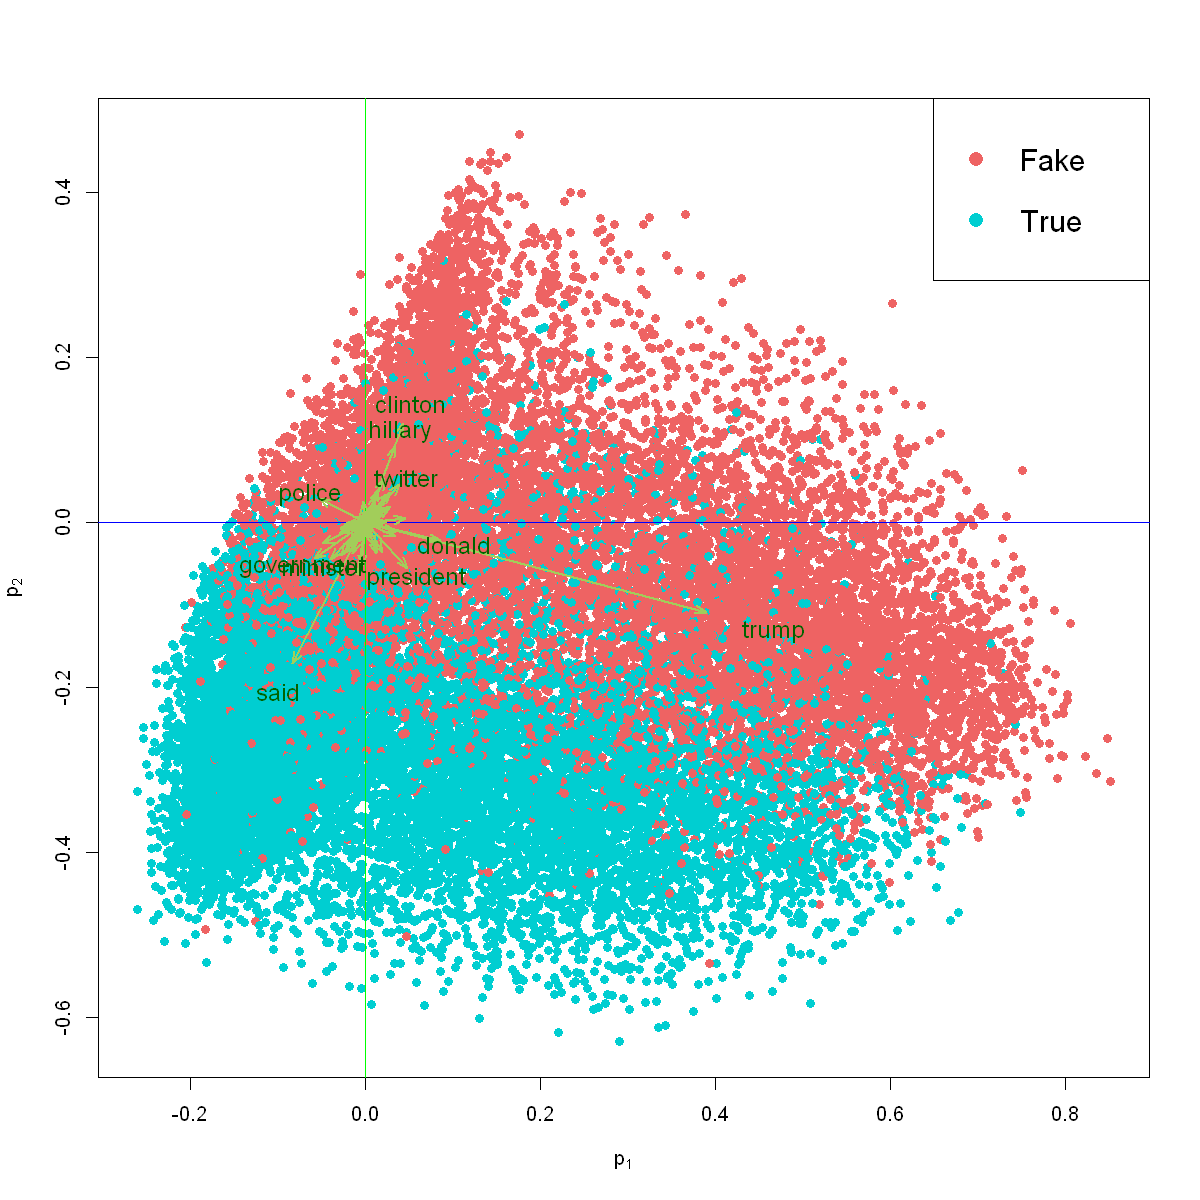

In [34]:
pca.sd = sqrt(e$values)
pca.loading <- e$vectors[,1:2] # select the first two principal components
pca.scores <- as.matrix(train %>% select(-label)) %*% pca.loading
# Plot
plot(pca.scores, pch = 16,
     xlab = expression('p'[1]), 
     ylab = expression('p'[2]),
    col = c("indianred2", "darkturquoise")[as.factor(train$label)])
legend("topright",unique(train$label),col=c("indianred2", "darkturquoise"),pch=16, cex=1.5)
abline(h = 0, col = "blue")
abline(v = 0, col = "green")

# This is to make the size of the lines more apparent
factor <- 0.5

# Plot the variables as vectors
arrows(0,0,loading.vector[,1]*pca.sd[1]/factor,
        loading.vector[,2]*pca.sd[2]/factor,
        length = 0.1,
        lwd=  2,
        angle = 20,
        col = "darkolivegreen3")

# Plot annotations
text(loading.vector[,1]*pca.sd[1]/factor*1.2,
      loading.vector[,2]*pca.sd[2]/factor*1.2,
      rownames(loading.vector),
      col = "darkgreen",
      cex = 1.2)